In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [3]:
# Handle missing values (if any)
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Split "Blood Pressure" into "Systolic Pressure" and "Diastolic Pressure"
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original "Blood Pressure" column
data = data.drop('Blood Pressure', axis=1)

# Identify categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = data.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Apply the transformations
X = preprocessor.fit_transform(X)


<ipython-input-3-7fb0ae97f53d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate KNN model
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       1.00      0.76      0.87        17

    accuracy                           0.87        31
   macro avg       0.89      0.88      0.87        31
weighted avg       0.90      0.87      0.87        31

[[14  0]
 [ 4 13]]


In [6]:
# Train SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict and evaluate SVM model
y_pred_svm = svm.predict(X_test)
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.87      0.76      0.81        17

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

[[12  2]
 [ 4 13]]


In [7]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.83      0.88      0.86        17

    accuracy                           0.84        31
   macro avg       0.84      0.83      0.84        31
weighted avg       0.84      0.84      0.84        31

[[11  3]
 [ 2 15]]


In [8]:
# Train Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Predict and evaluate Decision Tree model
y_pred_tree = tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

[[12  2]
 [ 3 14]]


In [9]:
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate Random Forest model
y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

[[12  2]
 [ 2 15]]


In [10]:
# Train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Predict and evaluate Gradient Boosting model
y_pred_gb = gb.predict(X_test)
print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

[[12  2]
 [ 2 15]]


In [11]:
# Train AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

# Predict and evaluate AdaBoost model
y_pred_ada = ada.predict(X_test)
print('AdaBoost Accuracy:', accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))


AdaBoost Accuracy: 0.9354838709677419
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.94        17

    accuracy                           0.94        31
   macro avg       0.94      0.94      0.94        31
weighted avg       0.94      0.94      0.94        31

[[14  0]
 [ 2 15]]


In [12]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

[[12  2]
 [ 3 14]]


In [13]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict and evaluate Naive Bayes model
y_pred_nb = nb.predict(X_test)
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        14
           1       0.87      0.76      0.81        17

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31

[[12  2]
 [ 4 13]]


In [14]:
from sklearn.neural_network import MLPClassifier

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predict and evaluate MLP model
y_pred_mlp = mlp.predict(X_test)
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp))


MLP Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31

[[12  2]
 [ 2 15]]


In [15]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# List of classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Dictionary to store the results
results = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']
    recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                     accuracy  precision    recall  f1_score
KNN                  0.870968   0.899642  0.870968  0.870430
SVM                  0.806452   0.813978  0.806452  0.806855
Logistic Regression  0.838710   0.839123  0.838710  0.838027
Decision Tree        0.838710   0.841129  0.838710  0.839047
Random Forest        0.870968   0.870968  0.870968  0.870968
Gradient Boosting    0.870968   0.870968  0.870968  0.870968
AdaBoost             0.838710   0.839123  0.838710  0.838027
XGBoost              0.838710   0.841129  0.838710  0.839047
Naive Bayes          0.806452   0.813978  0.806452  0.806855
Neural Network       0.870968   0.870968  0.870968  0.870968


In [16]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier  # Added import for KNN
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Handle missing values (if any)
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Split "Blood Pressure" into "Systolic Pressure" and "Diastolic Pressure"
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original "Blood Pressure" column
data = data.drop('Blood Pressure', axis=1)

# Identify categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = data.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Apply the transformations
X = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Example, you can adjust n_neighbors
knn.fit(X_train, y_train)

# Predict and evaluate KNN model
y_pred_knn = knn.predict(X_test)

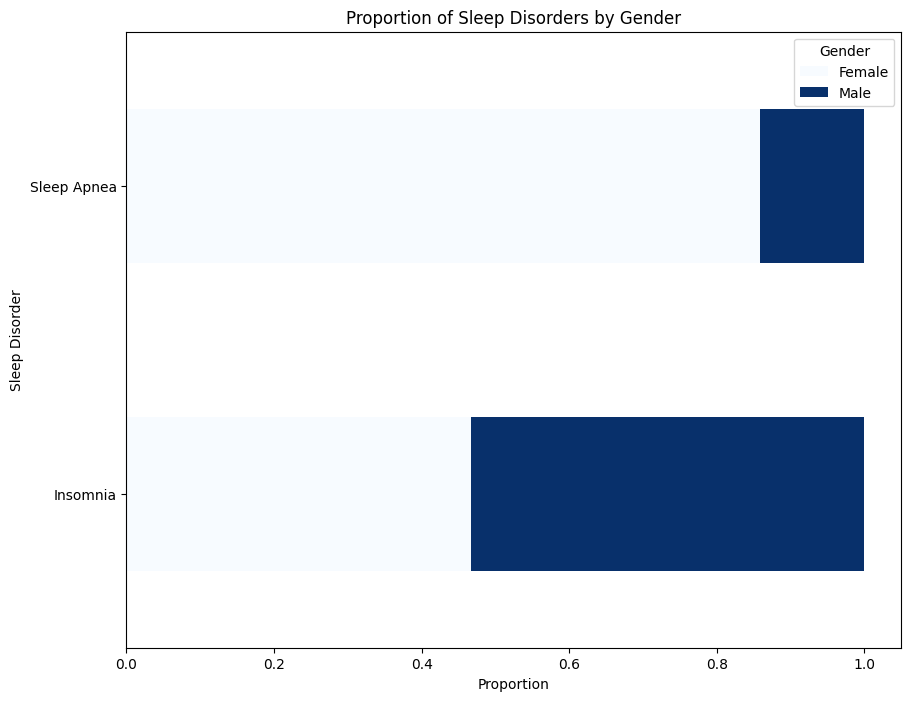

In [19]:
# Convert encoded target back to original labels
data['Sleep Disorder'] = label_encoder.inverse_transform(data['Sleep Disorder'])

# Create a proportion table (optional)
proportion_table = pd.crosstab(data['Sleep Disorder'], data['Gender'], normalize='index')

# Plotting the horizontal bar plot (optional)
proportion_table.plot(kind='barh', stacked=True, colormap='Blues', figsize=(10, 8))
plt.title('Proportion of Sleep Disorders by Gender')
plt.xlabel('Proportion')
plt.ylabel('Sleep Disorder')
plt.legend(title='Gender')
plt.show()

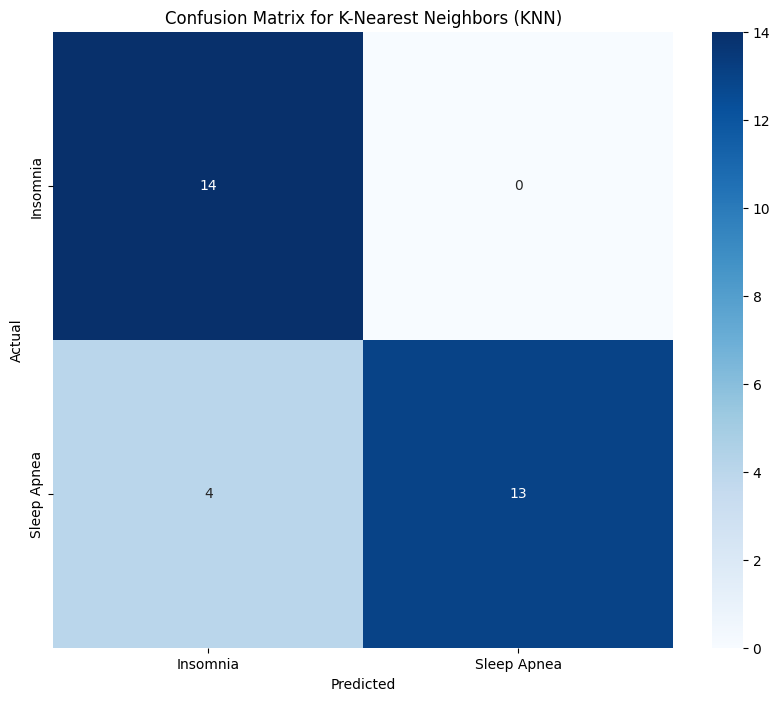

In [20]:
# Generate the confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix heatmap for KNN
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for K-Nearest Neighbors (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

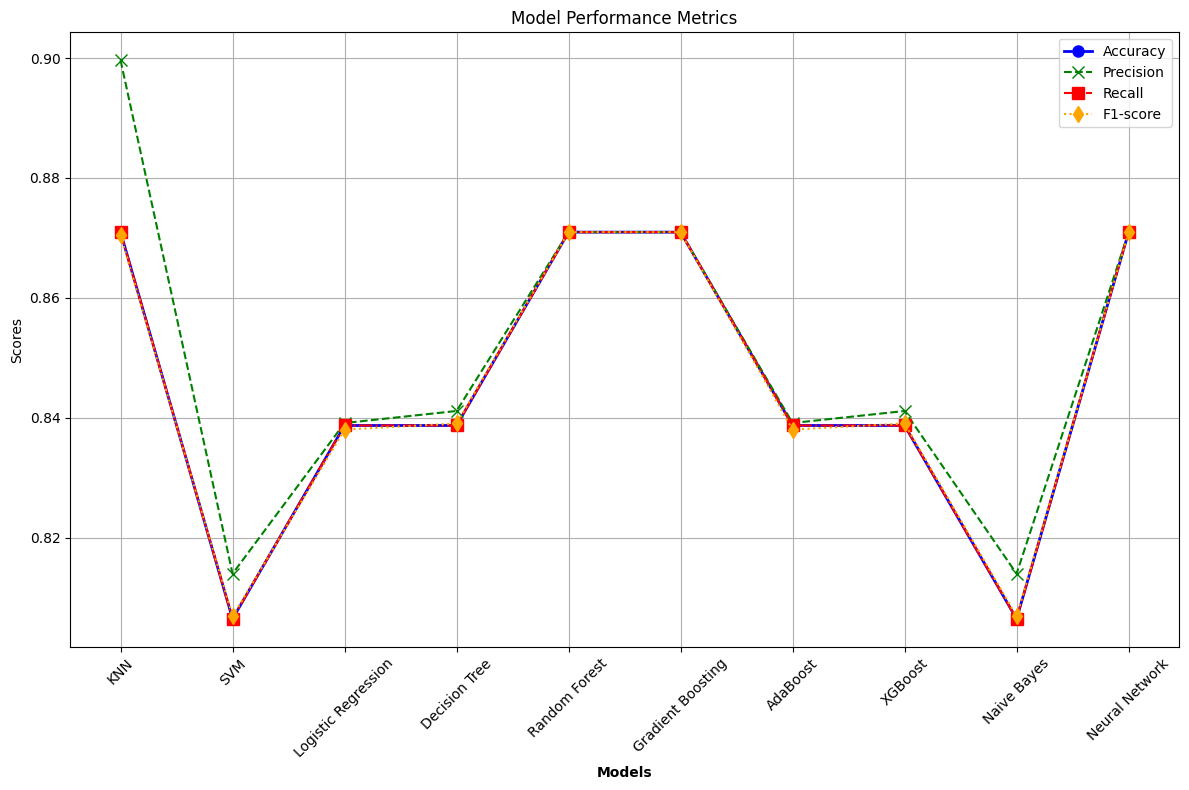

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
models = ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree',
          'Random Forest', 'Gradient Boosting', 'AdaBoost',
          'XGBoost', 'Naive Bayes', 'Neural Network']
accuracy = [0.870968, 0.806452, 0.838710, 0.838710, 0.870968, 0.870968, 0.838710, 0.838710, 0.806452, 0.870968]
precision = [0.899642, 0.813978, 0.839123, 0.841129, 0.870968, 0.870968, 0.839123, 0.841129, 0.813978, 0.870968]
recall = [0.870968, 0.806452, 0.838710, 0.838710, 0.870968, 0.870968, 0.838710, 0.838710, 0.806452, 0.870968]
f1_score = [0.870430, 0.806855, 0.838027, 0.839047, 0.870968, 0.870968, 0.838027, 0.839047, 0.806855, 0.870968]

# Number of models
num_models = len(models)

# Set the positions of the models on the x-axis
x = np.arange(num_models)

# Create the figure and set the size
plt.figure(figsize=(12, 8))

# Plot lines for accuracy, precision, recall, and f1-score
plt.plot(x, accuracy, marker='o', linestyle='-', color='b', label='Accuracy', linewidth=2, markersize=8)
plt.plot(x, precision, marker='x', linestyle='--', color='g', label='Precision', linewidth=1.5, markersize=8)
plt.plot(x, recall, marker='s', linestyle='-.', color='r', label='Recall', linewidth=1.5, markersize=8)
plt.plot(x, f1_score, marker='d', linestyle=':', color='orange', label='F1-score', linewidth=1.5, markersize=8)

# Add labels, tick labels and legend
plt.xlabel('Models', fontweight='bold')
plt.xticks(x, models, rotation=45)
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.legend()

# Show plot
plt.tight_layout()
plt.grid(True)  # Add grid for better readability
plt.show()


ROC CURVES

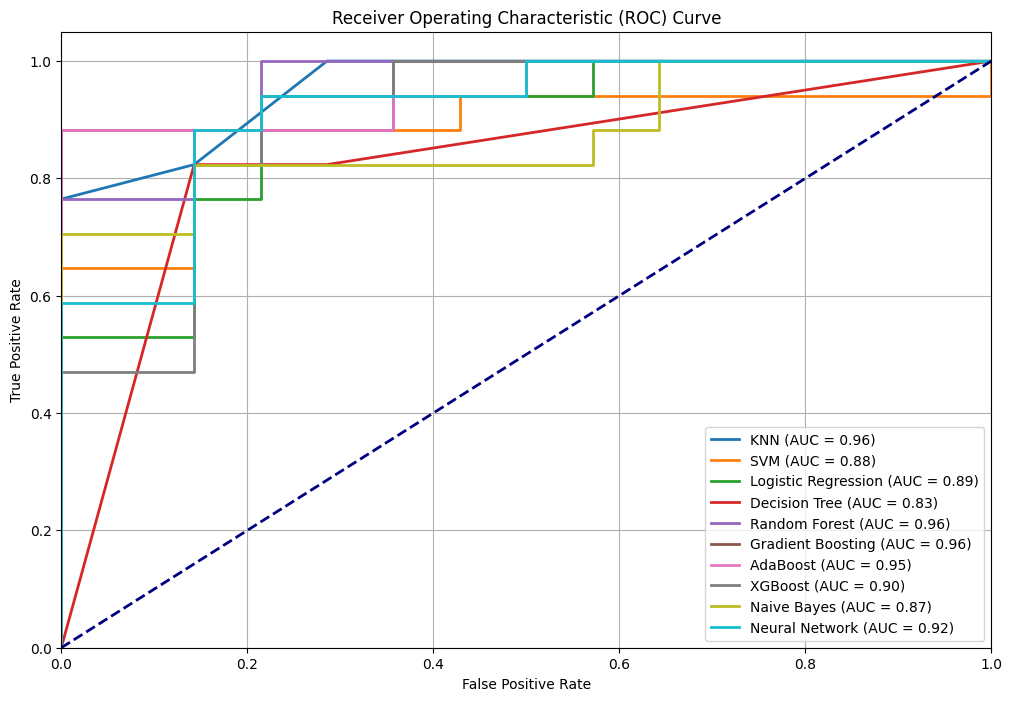

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Handle missing values (if any)
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Split "Blood Pressure" into "Systolic Pressure" and "Diastolic Pressure"
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original "Blood Pressure" column
data = data.drop('Blood Pressure', axis=1)

# Identify categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = data.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Apply the transformations
X = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Dictionary to store the ROC curve information
roc_info = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:  # For classifiers that do not have predict_proba
        y_proba = clf.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Normalize to [0,1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_info[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plot ROC curves
plt.figure(figsize=(12, 8))
for name, info in roc_info.items():
    plt.plot(info['fpr'], info['tpr'], lw=2, label=f'{name} (AUC = {info["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


PRECISION RECALL

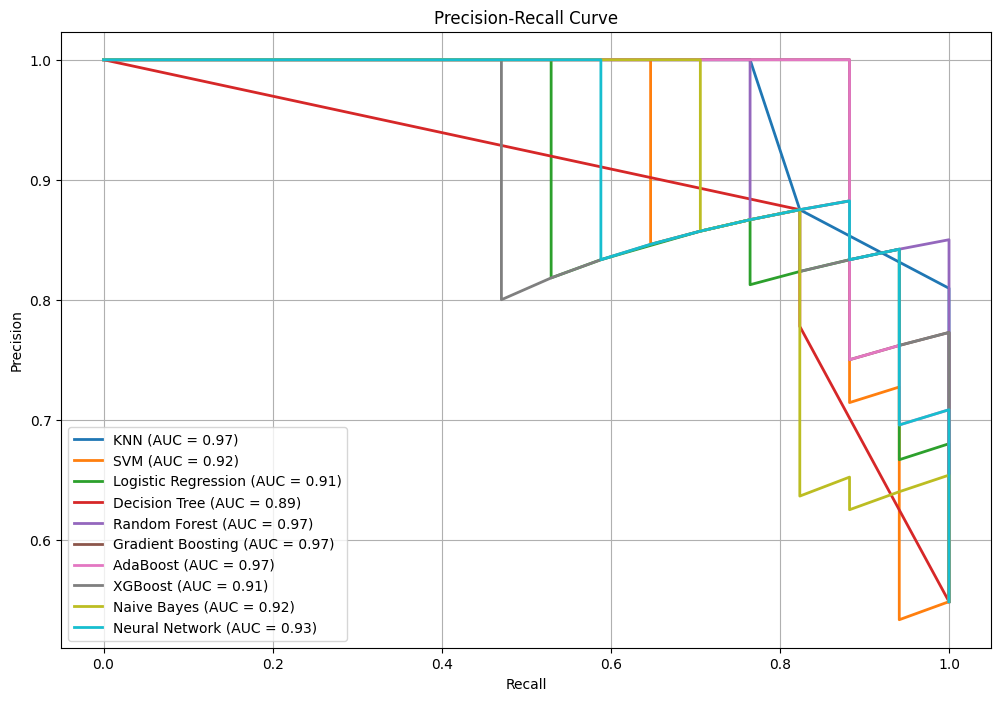

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

# Handle missing values (if any)
data = data.dropna()

# Encode target variable
label_encoder = LabelEncoder()
data['Sleep Disorder'] = label_encoder.fit_transform(data['Sleep Disorder'])

# Split "Blood Pressure" into "Systolic Pressure" and "Diastolic Pressure"
data[['Systolic Pressure', 'Diastolic Pressure']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)

# Drop the original "Blood Pressure" column
data = data.drop('Blood Pressure', axis=1)

# Identify categorical columns
categorical_cols = ['Gender', 'Occupation', 'BMI Category']

# Apply one-hot encoding to categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = data.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = data['Sleep Disorder']

# Apply the transformations
X = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000)
}

# Dictionary to store the PR curve information
pr_info = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:  # For classifiers that do not have predict_proba
        y_proba = clf.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Normalize to [0,1]

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    pr_info[name] = {'precision': precision, 'recall': recall, 'pr_auc': pr_auc}

# Plot Precision-Recall curves
plt.figure(figsize=(12, 8))
for name, info in pr_info.items():
    plt.plot(info['recall'], info['precision'], lw=2, label=f'{name} (AUC = {info["pr_auc"]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()
